### Exemplo Real: Carteira de Ativos

- Temos a carteira no arquivo "Carteira.xlsx" e queremos comparar essa carteira com o índice IBOV para saber se ela ganhou do índice

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pandas_datareader.data as pdr
import yfinance

yfinance.pdr_override()

In [ ]:
df_carteira = pd.read_excel("././01_auxiliares/arquivos_base/Carteira.xlsx")
display(df_carteira)

,Ativos,Tipo,Qtde
0,BOVA11,ETF,100
1,SMAL11,ETF,100
2,MGLU3,Ação,100
3,BBDC4,Ação,100
4,ITUB4,Ação,300
5,ENEV3,Ação,100
6,MOVI3,Ação,100
7,BPAC11,Ação,100
8,NTCO3,Ação,100
9,BCRI11,FII,100


In [49]:
data_inicial = datetime.now() - timedelta(days=360)
data_final = datetime.now()

lista_ativos = list(df_carteira["Ativos"].astype(str) + ".SA")

df_cotacoes = pdr.get_data_yahoo(lista_ativos, data_inicial, data_final)["Adj Close"]
display(df_cotacoes)

[*********************100%***********************]  13 of 13 completed


,BBDC4.SA,BCRI11.SA,BOVA11.SA,BPAC11.SA,ENEV3.SA,ITUB4.SA,KNRI11.SA,MGLU3.SA,MOVI3.SA,NTCO3.SA,SMAL11.SA,VILG11.SA,XPLG11.SA
Date,,,,,,,,,,,,,
2022-08-15,18.187853,93.295067,108.970001,25.680342,15.60,25.412844,138.152283,4.04,14.584063,15.000000,110.599998,96.121231,92.086205
2022-08-16,18.449949,93.073883,109.760002,25.553984,15.61,25.704947,137.044662,4.15,14.440706,14.680000,110.000000,96.554321,91.976242
2022-08-17,18.478035,93.436653,109.989998,25.622025,15.68,25.770901,137.016998,4.02,14.851660,14.310000,109.230003,96.296303,94.193634
2022-08-18,18.590361,92.020943,109.940002,25.476219,15.70,25.695522,136.952393,4.03,14.526719,15.070000,108.599998,96.987434,94.743416
2022-08-19,18.356346,92.472214,107.529999,25.116581,15.42,25.387232,136.924713,3.78,13.819498,14.470000,105.750000,97.171722,96.502655
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-04,15.450000,74.800003,115.660004,32.548557,13.02,27.879999,162.020004,3.06,12.160000,17.730000,113.849998,110.589996,114.489998
2023-08-07,15.340000,74.849998,115.610001,33.009998,12.92,27.660000,163.300003,3.01,12.050000,17.520000,113.400002,110.300003,114.480003
2023-08-08,15.410000,74.000000,115.269997,33.000000,12.77,27.600000,163.889999,2.99,12.250000,17.360001,112.529999,111.209999,114.790001


#### Ajustando os dados

In [ ]:
# Preenche dados vazios com o dado da linha anterior
df_cotacoes = df_cotacoes.ffill()
print(df_cotacoes.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 248 entries, 2022-08-15 to 2023-08-10
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   BBDC4.SA   248 non-null    float64
 1   BCRI11.SA  248 non-null    float64
 2   BOVA11.SA  248 non-null    float64
 3   BPAC11.SA  248 non-null    float64
 4   ENEV3.SA   248 non-null    float64
 5   ITUB4.SA   248 non-null    float64
 6   KNRI11.SA  248 non-null    float64
 7   MGLU3.SA   248 non-null    float64
 8   MOVI3.SA   248 non-null    float64
 9   NTCO3.SA   248 non-null    float64
 10  SMAL11.SA  248 non-null    float64
 11  VILG11.SA  248 non-null    float64
 12  XPLG11.SA  248 non-null    float64
dtypes: float64(13)
memory usage: 27.1 KB
None


#### Para compararmos oscilações, precisamos normalizar

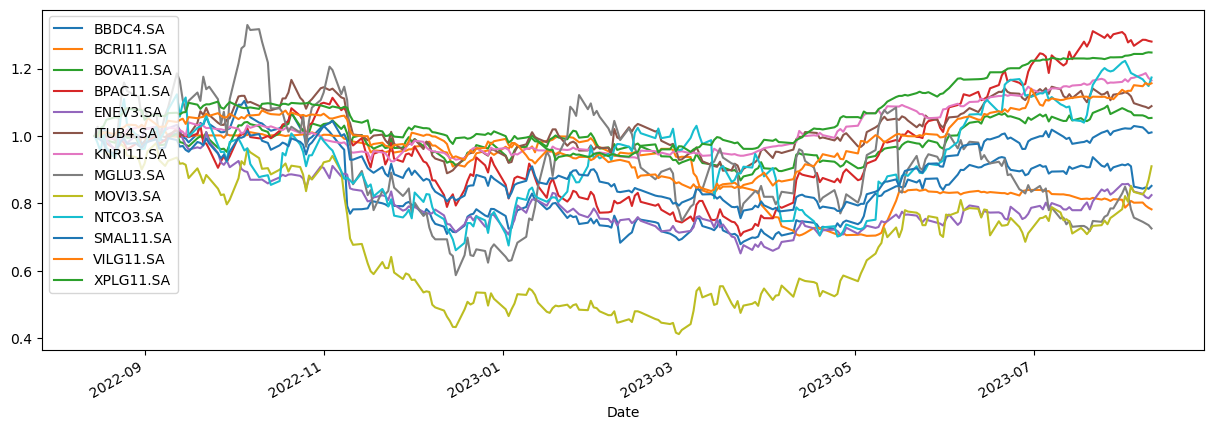

In [ ]:
# Ao fazer isso, considera-se a variação em relação ao primeiro dia da tabela, considerando este como 1 e o resto como percentual
df_cotacoes_norm = df_cotacoes / df_cotacoes.iloc[0]
df_cotacoes_norm.plot(figsize=(15, 5))
plt.legend(loc="upper left")
plt.show()

#### Puxando o IBOV para comparar

In [52]:
df_ibov = pdr.get_data_yahoo("^BVSP", data_inicial, data_final)["Adj Close"]
display(df_ibov)

[*********************100%***********************]  1 of 1 completed


Date
2022-08-15    113032.00000
2022-08-16    113512.00000
2022-08-17    113708.00000
2022-08-18    113813.00000
2022-08-19    111496.00000
                  ...     
2023-08-04    119508.00000
2023-08-07    119380.00000
2023-08-08    119090.00000
2023-08-09    118409.00000
2023-08-10    118559.71875
Name: Adj Close, Length: 248, dtype: float64

#### Vendo valores investidos

In [53]:
df_valor_investido = pd.DataFrame()

for ativo in df_carteira["Ativos"]:
    qtde_acoes = df_carteira.loc[df_carteira["Ativos"]==ativo, "Qtde"].values[0]
    df_valor_investido[ativo] = qtde_acoes * df_cotacoes[f"{ativo}.SA"]

df_valor_investido["Total"] = df_valor_investido.sum(axis=1)
display(df_valor_investido)

,BOVA11,SMAL11,MGLU3,BBDC4,ITUB4,ENEV3,MOVI3,BPAC11,NTCO3,BCRI11,VILG11,KNRI11,XPLG11,Total
Date,,,,,,,,,,,,,,
2022-08-15,10897.000122,11059.999847,403.999996,1818.785286,7623.853111,1560.000038,1458.406258,2568.034172,1500.000000,9329.506683,9612.123108,13815.228271,9208.620453,80855.557346
2022-08-16,10976.000214,11000.000000,415.000010,1844.994926,7711.483955,1560.999966,1444.070625,2555.398369,1468.000031,9307.388306,9655.432129,13704.466248,9197.624207,80840.858984
2022-08-17,10998.999786,10923.000336,401.999998,1847.803497,7731.270218,1568.000031,1485.165977,2562.202454,1431.000042,9343.665314,9629.630280,13701.699829,9419.363403,81043.801165
2022-08-18,10994.000244,10859.999847,403.000021,1859.036064,7708.656693,1569.999981,1452.671909,2547.621918,1506.999969,9202.094269,9698.743439,13695.239258,9474.341583,80972.405195
2022-08-19,10752.999878,10575.000000,377.999997,1835.634613,7616.169548,1542.000008,1381.949806,2511.658096,1447.000027,9247.221375,9717.172241,13692.471313,9650.265503,80347.542405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-04,11566.000366,11384.999847,305.999994,1544.999981,8363.999748,1302.000046,1215.999985,3254.855728,1772.999954,7480.000305,11058.999634,16202.000427,11448.999786,86901.855803
2023-08-07,11561.000061,11340.000153,300.999999,1534.000015,8297.999954,1292.000008,1205.000019,3300.999832,1752.000046,7484.999847,11030.000305,16330.000305,11448.000336,86877.000880
2023-08-08,11526.999664,11252.999878,299.000001,1540.999985,8280.000114,1277.000046,1225.000000,3300.000000,1736.000061,7400.000000,11120.999908,16388.999939,11479.000092,86826.999688


#### Comparando carteira com o Índice

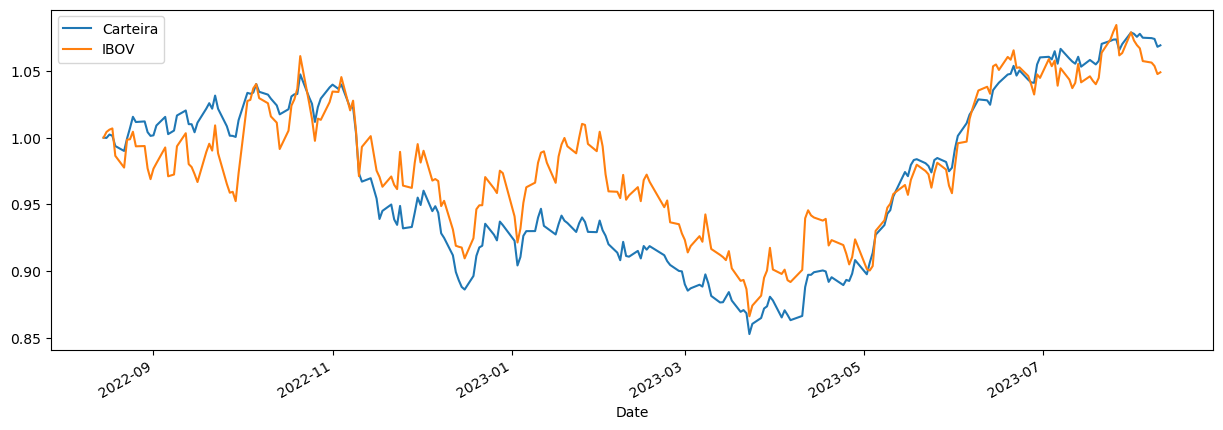

In [54]:
df_ibov_norm = df_ibov / df_ibov.iloc[0]
df_valor_investido_norm = df_valor_investido / df_valor_investido.iloc[0]

df_valor_investido_norm["Total"].plot(label="Carteira", figsize=(15, 5))
df_ibov_norm.plot(label="IBOV")
plt.legend()
plt.show()

#### Calculando retorno e correlação

In [55]:
# Retorno
retorno_ibov = df_ibov_norm[-1] - 1
retorno_carteira = df_valor_investido_norm["Total"][-1] - 1

print(f"Retorno IBOV: {retorno_ibov:.1%}")
print(f"Retorno Carteira: {retorno_carteira:.1%}")

Retorno IBOV: 4.9%
Retorno Carteira: 6.9%


In [56]:
# Correlação
print(df_valor_investido["Total"].corr(df_ibov))

0.9235972347091526
